# **Background Subtraction**

**Background subtraction is a technique used in computer vision to separate the moving foreground objects from a static or quasi-static background. It is commonly used in surveillance, traffic monitoring, and other applications where distinguishing moving objects from the background is important.**

**MOG:** Uses multiple Gaussian distributions per pixel for complex background modeling (ideal for dynamic backgrounds).

**MOG2** An adaptive version of MOG that handles gradual background changes and can detect shadows.

**KNN:** Uses recent pixel history with a K-Nearest Neighbors approach, best for simple backgrounds.

**GMG:** Combines pixel intensity with statistical history for adaptive background learning after initialization.

**CNT:** Uses a codebook model for each pixel color, efficient for stable lighting conditions but less adaptive.

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Define the path to your video file
video_path = '/content/park.mp4'  # Update this path as needed

# Open the video capture
cap = cv.VideoCapture(video_path)

# Check if the video file opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Initialize background subtraction algorithms
algo1 = cv.createBackgroundSubtractorMOG2(detectShadows=True)
algo2 = cv.createBackgroundSubtractorKNN(detectShadows=True)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is not correctly captured, break the loop
    if not ret:
        print("Error: Could not read frame. Exiting...")
        break

    # Resize the frame for consistency in display
    frame = cv.resize(frame, (600, 400))

    # Apply background subtraction algorithms
    res1 = algo1.apply(frame)
    res2 = algo2.apply(frame)

    # Display the original frame
    print("Original Frame")
    cv2_imshow(frame)

    # Display result of MOG2 Background Subtraction
    print("MOG2 Background Subtraction")
    cv2_imshow(res1)

    # Display result of KNN Background Subtraction
    print("KNN Background Subtraction")
    cv2_imshow(res2)

    # Wait for a key event for 60ms; exit on 'q' or ESC
    keyboard = cv.waitKey(60)
    if keyboard == ord('q') or keyboard == 27:
        print("Exiting on user request.")
        break

# Release video capture and close all OpenCV windows
cap.release()
cv.destroyAllWindows()


In [5]:
# Install Kaggle API if not already installed
!pip install kaggle

# Download the specific dataset
!kaggle datasets download -d nacl3084/haarcascade-eye

# Unzip the downloaded file
!unzip haarcascade-eye.zip -d /content/haarcascade-eye


Dataset URL: https://www.kaggle.com/datasets/nacl3084/haarcascade-eye
License(s): MIT
  0% 0.00/52.7k [00:00<?, ?B/s]
100% 52.7k/52.7k [00:00<00:00, 75.8MB/s]
Archive:  haarcascade-eye.zip
  inflating: /content/haarcascade-eye/haarcascade_eye.xml  


In [6]:
# Install Kaggle API if not installed
!pip install kaggle

# Download the specific dataset
!kaggle datasets download -d ravinash218/haarcascade-frontalface-default

# Unzip the downloaded file
!unzip haarcascade-frontalface-default.zip -d /content/haarcascade-frontalface-default


Dataset URL: https://www.kaggle.com/datasets/ravinash218/haarcascade-frontalface-default
License(s): unknown
  0% 0.00/136k [00:00<?, ?B/s]
100% 136k/136k [00:00<00:00, 70.1MB/s]
Archive:  haarcascade-frontalface-default.zip
  inflating: /content/haarcascade-frontalface-default/haarcascade_frontalface_default.xml  


In [9]:
# Download the Haar cascade files for face and eye detection
!wget -O haarcascade_frontalface_default.xml https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget -O haarcascade_eye.xml https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml


--2024-11-13 04:47:42--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2024-11-13 04:47:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.01s   

2024

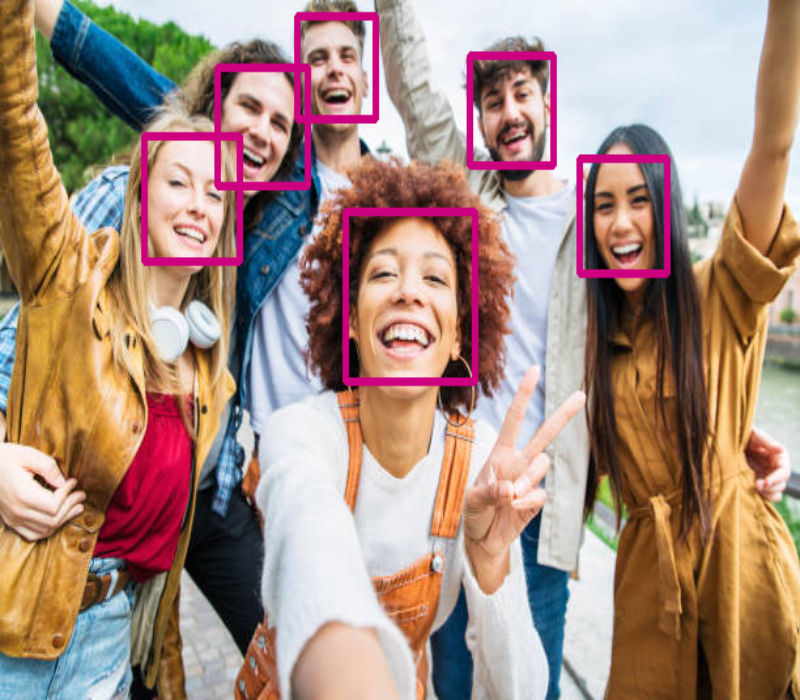

In [21]:
import cv2
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Colab

# Load Haarcascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
#eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

# Load the image (make sure your image is available in the environment)
image = cv2.imread("/content/fri.jpg")  # Adjust path if needed

# Check if the image loaded correctly
if image is None:
    print("Error: Could not load the image.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x + w, y + h), (127, 0, 205), 3)

        # Define the region of interest in grayscale and color images
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = image[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)

        # Loop over each detected eye and draw a rectangle around it
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)

    # Resize the final image for display purposes
    image = cv2.resize(image, (800, 700))

    # Display the image with detected faces and eyes
    cv2_imshow(image)


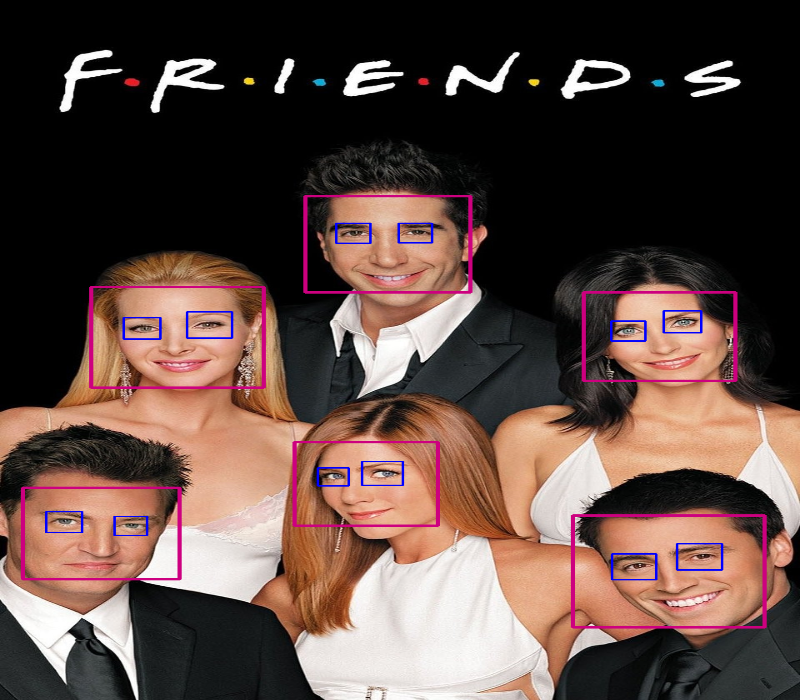

In [23]:
import cv2
from google.colab.patches import cv2_imshow

# Download Haar cascade files if they aren't already present
!wget -q -nc https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget -q -nc https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml

# Load the cascades
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

# Load the uploaded image
image_path = "/content/fri3.jpg"  # Path to your uploaded image
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not load image.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x + w, y + h), (127, 0, 205), 3)

        # Define the region of interest for eyes within the face area
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = image[y:y + h, x:x + w]

        # Adjust parameters for eye detection for better sensitivity
        eyes = eye_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.1,
            minNeighbors=3,  # Lowered this value for more sensitivity
            minSize=(10, 10)  # Reduced minimum size for eye detection
        )

        # Loop over each detected eye and draw a rectangle around it
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)

    # Resize for display purposes
    image = cv2.resize(image, (800, 700))

    # Display the result
    cv2_imshow(image)
